In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qgrid
import requests

qgrid.nbinstall()

In [23]:
r = requests.get('https://api.census.gov/data/2015/pep/population',
            params={
                'get': 'DENSITY,GEONAME',
                'for': 'county:*',
                'in': 'state:*',
            })
r.raise_for_status()
data = r.json()
density = pd.DataFrame(data[1:], columns=data[0]).set_index(['state', 'county'])
density['DENSITY'] = density['DENSITY'].astype(float)
density.head()

DENSITY                                            GEONAME
state county                                                               
01    001      93.107970  Autauga County, Alabama, East South Central, S...
      003     128.134329  Baldwin County, Alabama, East South Central, S...
      005      29.935235  Barbour County, Alabama, East South Central, S...
      007      36.273096  Bibb County, Alabama, East South Central, Sout...
      009      89.442295  Blount County, Alabama, East South Central, So...

In [24]:
# From https://api.census.gov/data/2015/acs/acs1/profile/variables.html
# DP04_0045E = Estimate!!HOUSING TENURE!!Occupied housing units
# DP04_0047E = Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied
r = requests.get('https://api.census.gov/data/2015/acs/acs1/profile',
            params={
                'get': 'DP04_0045E,DP04_0047E',
                'for': 'county:*',
                'in': 'state:*',
            })
r.raise_for_status()
data = r.json()
rental_rate = pd.DataFrame(data[1:], columns=data[0]).set_index(['state', 'county'])
rental_rate['DP04_0045E'] = rental_rate['DP04_0045E'].astype(int)
rental_rate['DP04_0047E'] = rental_rate['DP04_0047E'].astype(int)
rental_rate.head()

DP04_0045E  DP04_0047E
state county                        
01    003          72269       19037
      015          44323       13570
      043          30798        7744
      049          26247        8414
      051          29615        8250

In [28]:
data = density.join(rental_rate, how='inner')

In [29]:
data['rental_rate'] = data['DP04_0047E'] / data['DP04_0045E']

In [30]:
data.head()

DENSITY                                            GEONAME  \
state county                                                                  
01    003     128.134329  Baldwin County, Alabama, East South Central, S...   
      015     190.827012  Calhoun County, Alabama, East South Central, S...   
      043     111.586940  Cullman County, Alabama, East South Central, S...   
      049      91.533320  DeKalb County, Alabama, East South Central, So...   
      051     131.721227  Elmore County, Alabama, East South Central, So...   

              DP04_0045E  DP04_0047E  rental_rate  
state county                                       
01    003          72269       19037     0.263419  
      015          44323       13570     0.306162  
      043          30798        7744     0.251445  
      049          26247        8414     0.320570  
      051          29615        8250     0.278575

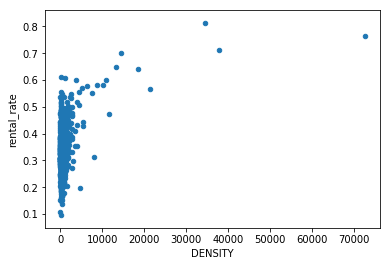

In [40]:
data.plot.scatter(y='rental_rate', x='DENSITY')

In [60]:
data['log_density'] = np.log(data['DENSITY'])

/home/natarajan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


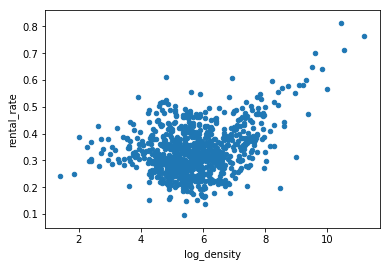

In [61]:
data.plot.scatter(y='rental_rate', x='log_density')